In [1]:
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import plotly.graph_objs as go
from wordcloud import WordCloud
import geopandas as gpd

In [2]:
dataset_df = pd.read_csv('Zomato Chennai Listing 2020.csv')

In [3]:
dataset_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [4]:
dataset_df.shape

(12032, 12)

In [5]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [6]:
dataset_df.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


In [7]:
#check redundant rows
#wrong_data = dataset_df['PAGE NO'] == 'PAGE NO'
#dataset_df[wrong_data]

In [8]:
# Checking for Null records
dataset_df.isnull().sum()

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [9]:
# Replacing the other null records with NA
#dataset_df.fillna('NA', inplace=True)

In [10]:
# Confirming all the null records are correct
#dataset_df.isnull().sum()

In [11]:
# Removing the bracket character from Days column
#dataset_df['Top Dishes'] = dataset_df['Top Dishes'].str.replace('[','',']','',regex=True)
#dataset_df.head()

In [12]:
# Checking info of all the columns
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [13]:
# Finding those restaurant whose has 0 Rating or Votes
#useless_data = (dataset_df['Dining Rating'] == 0.0) | (dataset_df['Delivery Rating'] == 0)
#dataset_df[useless_data]

In [14]:
#dataset_df['Location'].value_counts()

In [15]:
dataset_df.replace(to_replace = ['None','Invalid','Does not offer Delivery','Does not offer Dining','Not enough Delivery Reviews','Not enough Dining Reviews'], value =np.nan,inplace=True)
dataset_df.isnull().sum()

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes               9641
Price for 2                 0
Dining Rating            5351
Dining Rating Count      5351
Delivery Rating          5851
Delivery Rating Count    5851
Features                    0
dtype: int64

In [16]:
dataset_df['name of restaurant'] = dataset_df['Name of Restaurant'].apply(lambda x: x.lower())
dataset_df['Top Dishes'] = dataset_df["Top Dishes"].astype(str)
dataset_df['Top Dishes'] = dataset_df['Top Dishes'].apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
dataset_df['Cuisine'] = dataset_df["Cuisine"].astype(str)
dataset_df['Cuisine'] = dataset_df['Cuisine'].apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
dataset_df['Features'] = dataset_df['Features'].apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
dataset_df['Dining Rating Count'] = dataset_df['Dining Rating Count'].astype("Float32")
dataset_df['Delivery Rating Count'] = dataset_df['Delivery Rating Count'].astype("Float32")

In [17]:
def locsplit(x):
    if len(x.split(','))==2:
        return x.split(',')[1].replace(' ','')
    else:
        return x

dataset_df['Location_2'] = dataset_df['Location'].apply(lambda x: locsplit(x))

In [18]:
print(len(dataset_df['Location'].unique()))
print(len(dataset_df['Location_2'].unique()))

268
140


In [19]:
print(dataset_df['Location_2'].unique().tolist())

['Pallavaram', 'Alandur', 'Kodambakkam', 'Perambur', 'Medavakkam', 'Navallur', 'Anna Nagar East', 'T. Nagar', 'Velachery', 'Vadapalani', 'Porur', 'Kilpauk', 'Purasavakkam', 'Ashok Nagar', 'Chetpet', 'Aminijikarai', 'Ramapuram', 'Mylapore', 'Thuraipakkam', 'RA Puram', 'Alwarpet', 'Mogappair', 'West Mambalam', 'Adyar', 'Nungambakkam', 'Royapettah', 'Chromepet', 'Kolathur', 'Valasaravakkam', 'Guindy', 'Potheri', 'Egmore', 'Madipakkam', 'Thiruvanmiyur', 'Saligramam', 'Sholinganallur', 'Perungudi', 'Besant Nagar', 'Kotturpuram', 'Semmancheri', 'Royapuram', 'Anna Nagar West', 'Grand by GRT Hotels', 'Ambattur', 'Thousand Lights', 'Kanathur', 'Washermenpet', 'Selaiyur', 'Old Mahabalipuram Road (OMR)', 'Choolaimedu', 'Abhiramapuram', 'Triplicane', 'Poonamalle', 'Gopalapuram', 'East Coast Road (ECR)', 'Kandanchavadi', 'Palavakkam', 'BesantNagar', 'Neelangarai', 'GST Road', 'MRC Nagar', 'T.Nagar', 'RKSalai(CathedralRoad)', 'EastCoastRoad(ECR)', 'Somerset Greenways', 'Mahabalipuram', 'Foodies Kitc

In [20]:
#tofind restaurant unique features:
feat_list = [feat.lower() for feats in dataset_df['Features'].tolist() for feat in feats]
print(len(set(feat_list)))
print(list(set(feat_list)))

101
['', ' takeaway only', 'board games', ' wheelchair accessible', ' keto options', 'home delivery', ' table reservation required', ' vegetarian only', ' table booking for groups', ' live music', ' free wifi', 'serves halal', 'table reservation required', ' free parking', 'wheelchair accessible', ' wine', ' smoking area', ' live entertainment', 'table reservation not required', ' restricted entry', ' card upon delivery', 'mall parking', ' serves cocktails', ' lunch menu', ' nightlife', ' pool table', ' self service', 'serves alcohol', ' beer', ' gluten free options', ' mall parking', ' above 18 only', ' sports tv', ' desserts and bakes', ' members only', ' poolside', 'outdoor seating', ' bulk orders accepted', 'breakfast', ' table booking recommended', 'desserts and bakes', 'free parking', 'standing tables', ' resto bar', ' pre-ordering required', ' valet parking available', 'takeaway only', 'wine and beer', 'indoor seating', 'wifi', ' city view', ' drive in', ' catering available', '

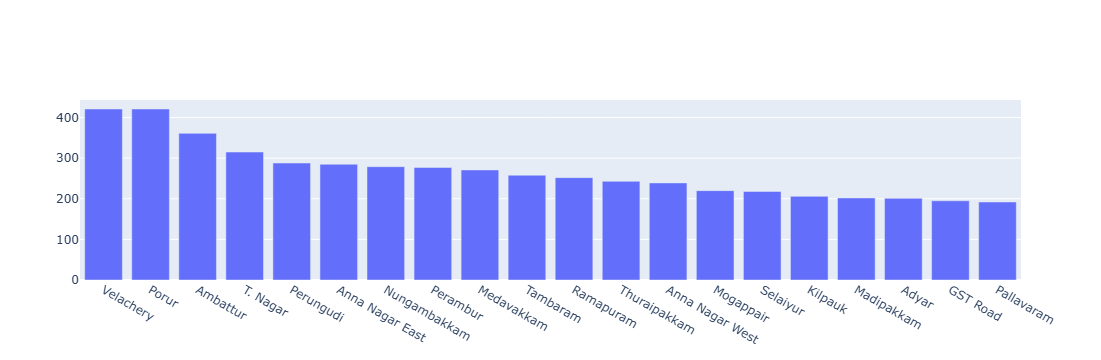

In [21]:
#location wise distribution
fig = go.Figure(data=[go.Bar(
                x = dataset_df['Location_2'].value_counts()[:20].index.tolist(),
                y = dataset_df['Location_2'].value_counts()[:20].values.tolist())])

fig.show()

In [22]:
#to find the number of franchise
dataset_df['name of restaurant'].value_counts()[:25]

name of restaurant
ck's bakery                  83
amma unavagam                78
domino's pizza               66
oyalo                        59
lassi shop                   58
cafe coffee day              51
five star chicken            50
meat and eat                 48
a2b - adyar ananda bhavan    45
ibaco                        44
hyku foods                   41
the cake world               39
mcrennett                    39
faasos                       38
sweet truth                  38
ovenstory pizza              38
subway                       38
the biryani life             38
the good bowl                37
firangi bake                 37
behrouz biryani              36
cake square                  36
mumbai kulfi                 36
pizza square                 34
sri krishna sweets           33
Name: count, dtype: int64

In [23]:
#Dining by rating
bins_r = [0,2.5,4,5]
Rating_r = ['bad','good','best']
dataset_df['Dining Rating'] = dataset_df['Dining Rating'].astype(float)
dataset_df['Dine_Verdict'] = pd.cut(dataset_df['Dining Rating'],bins_r,labels=Rating_r)
yv = dataset_df['Dine_Verdict'].value_counts().tolist()
colors = ['Orange','brown','yellow']
fig = go.Figure(data=[go.Bar(x=Rating_r,y=yv,marker_color=colors)])
fig.show()

<Axes: xlabel='Location_2'>

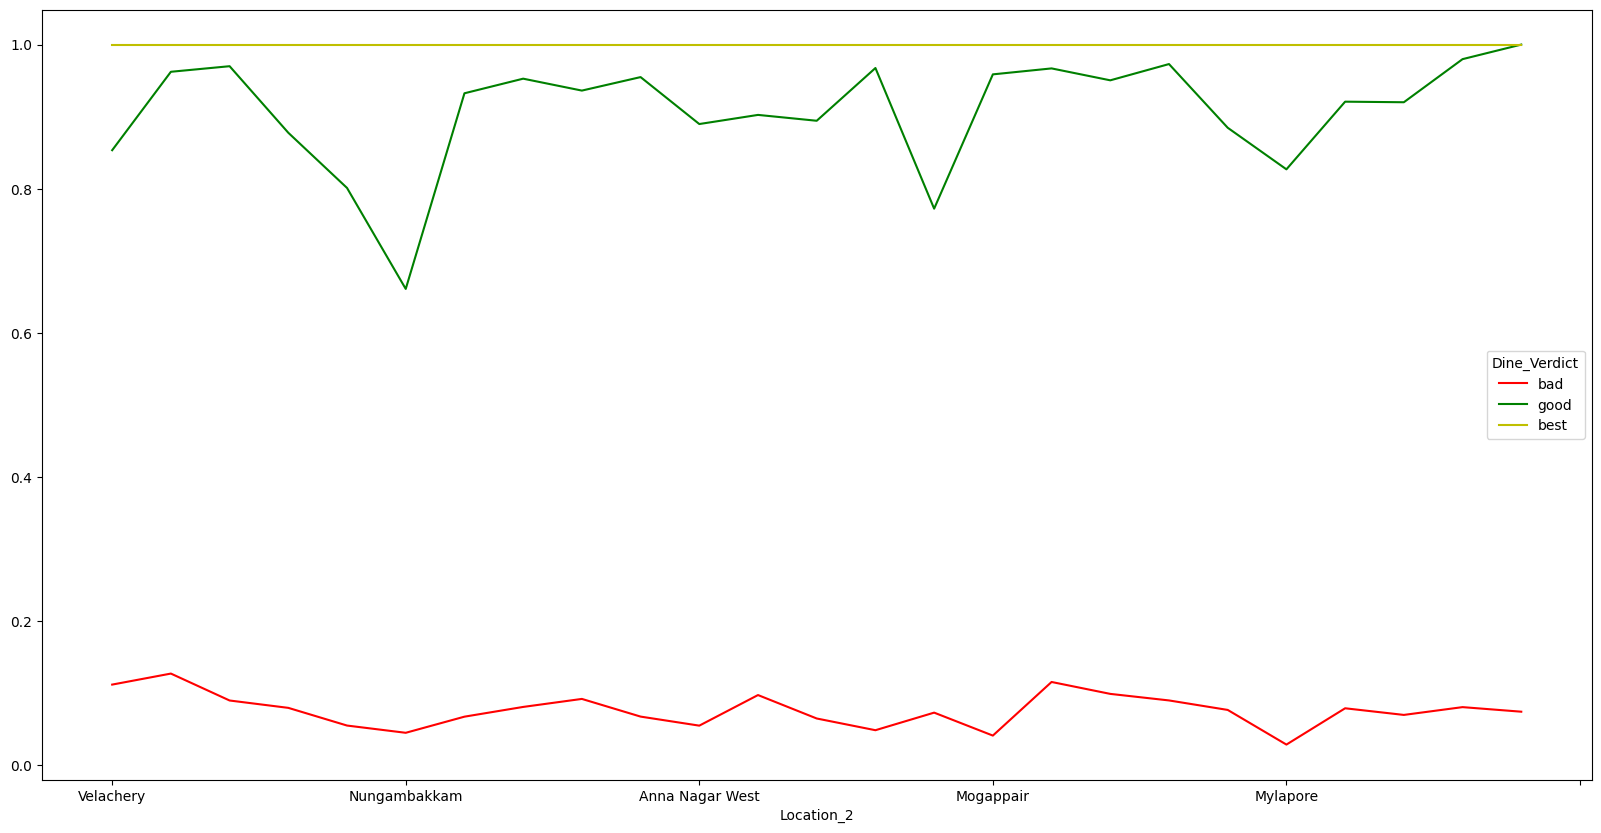

In [33]:
#Locationwise:
loc_price2 = pd.crosstab(dataset_df['Location_2'],dataset_df['Dine_Verdict'],margins=True,margins_name='Total') 
loc_price3 = loc_price2.sort_values('Total',ascending=False)[1:26]
loc_price3.drop(columns=['Total'],inplace=True)
loc_price3.div(loc_price3.sum(1).astype(float), axis=0).plot(kind="line", stacked=True,figsize=(20, 10),color = ['r','g','y','b'])

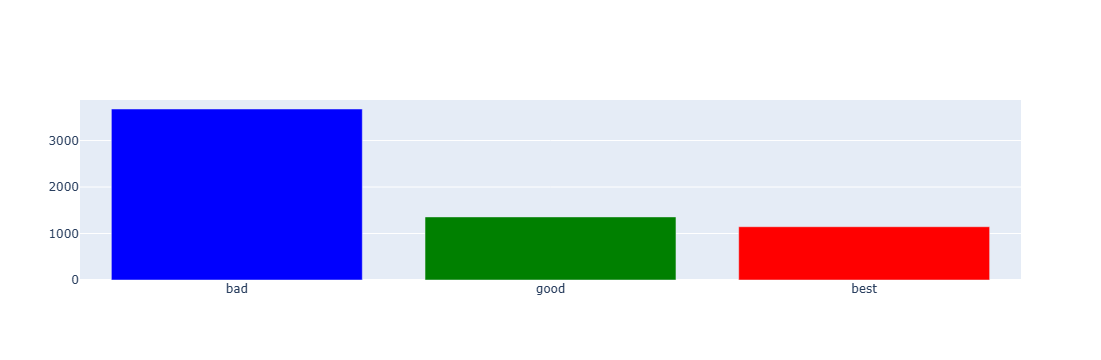

In [47]:
#Delivery by rating
bins_r = [0,3.5,4,5]
group_r = ['bad','good','best']
dataset_df['Delivery Rating'] = dataset_df['Delivery Rating'].astype(float)
dataset_df['Delivery_Verdict'] = pd.cut(dataset_df['Delivery Rating'],bins_r,labels=group_r)
yv = dataset_df['Delivery_Verdict'].value_counts().tolist()
colors = ['blue','green','red']
fig = go.Figure(data=[go.Bar(x=group_r,y=yv,marker_color=colors)])
fig.show()

<Axes: xlabel='Location_2'>

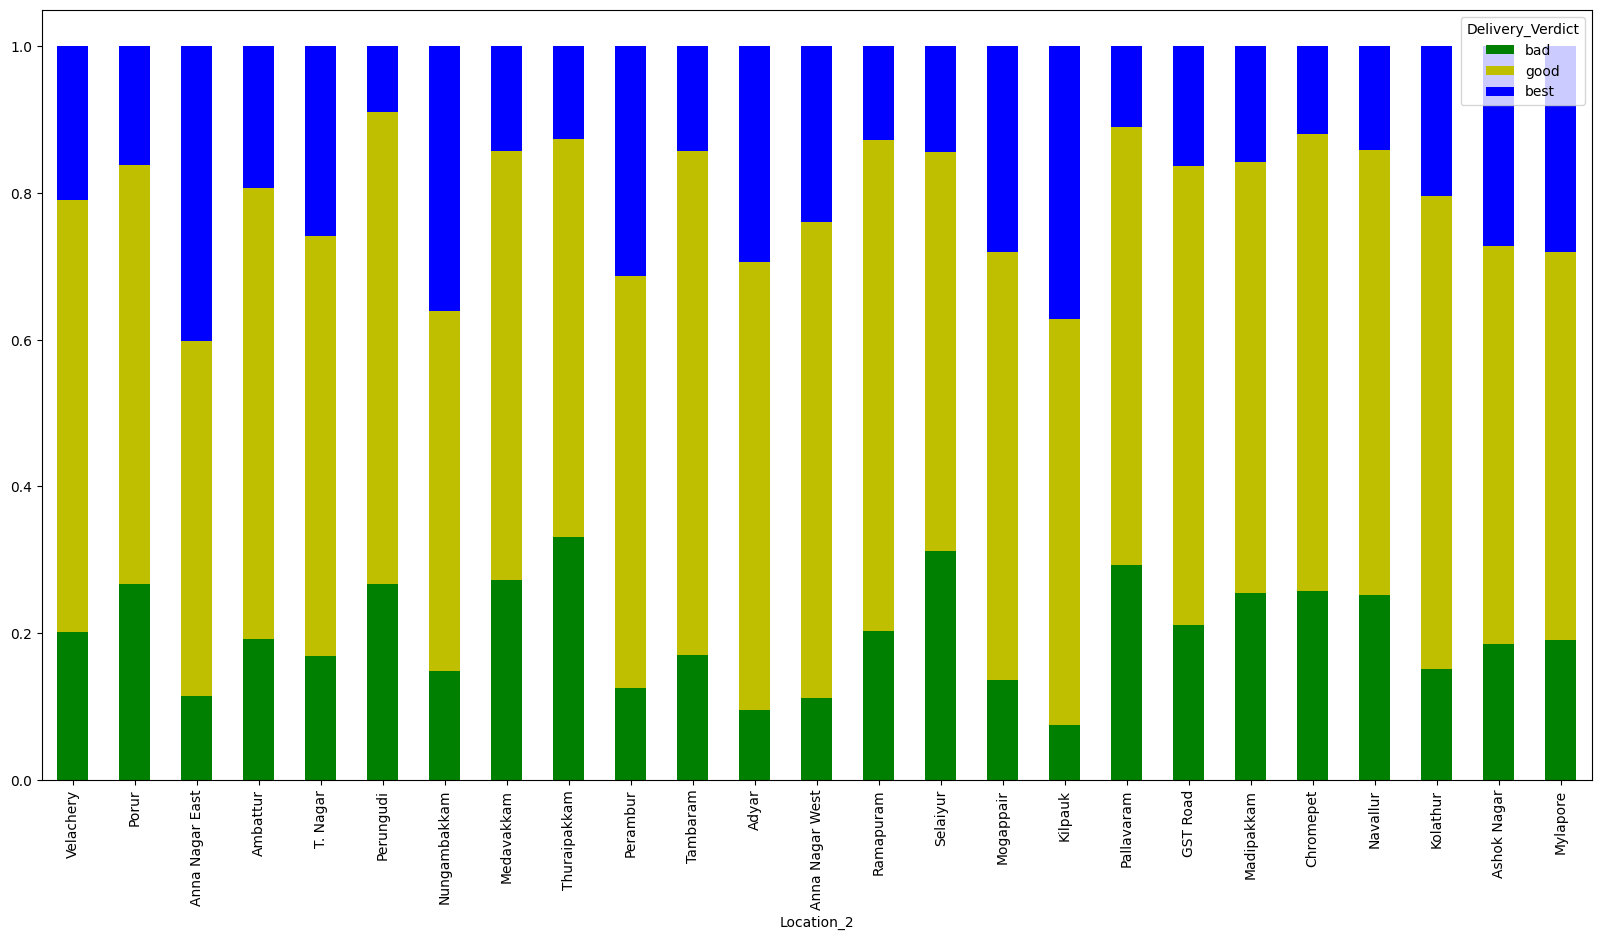

In [48]:
loc_price4 = pd.crosstab(dataset_df['Location_2'],dataset_df['Delivery_Verdict'],margins=True,margins_name='Total') 
loc_price5 = loc_price4.sort_values('Total',ascending=False)[1:26]
loc_price5.drop(columns=['Total'],inplace=True)
loc_price5.div(loc_price5.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20, 10),color = ['g','y','b','r'])

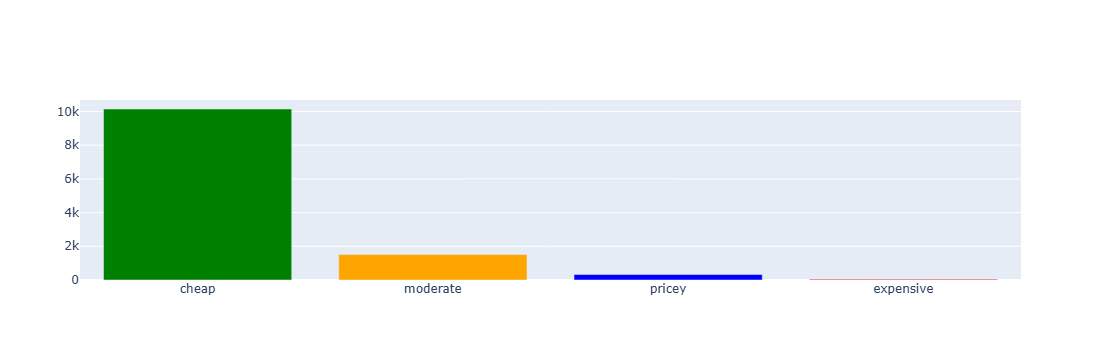

In [49]:
#Location wise price comparison
bins = [0,500,1000,2500,float("inf")]
groups = ['cheap','moderate','pricey','expensive']
dataset_df['Cost'] = pd.cut(dataset_df['Price for 2'], bins,labels=groups)
yc = dataset_df['Cost'].value_counts().tolist()
colors = ['green','orange','blue','red']
fig = go.Figure(data=[go.Bar(x=groups,y=yc,marker_color=colors)])
fig.show()

<Axes: xlabel='Location_2'>

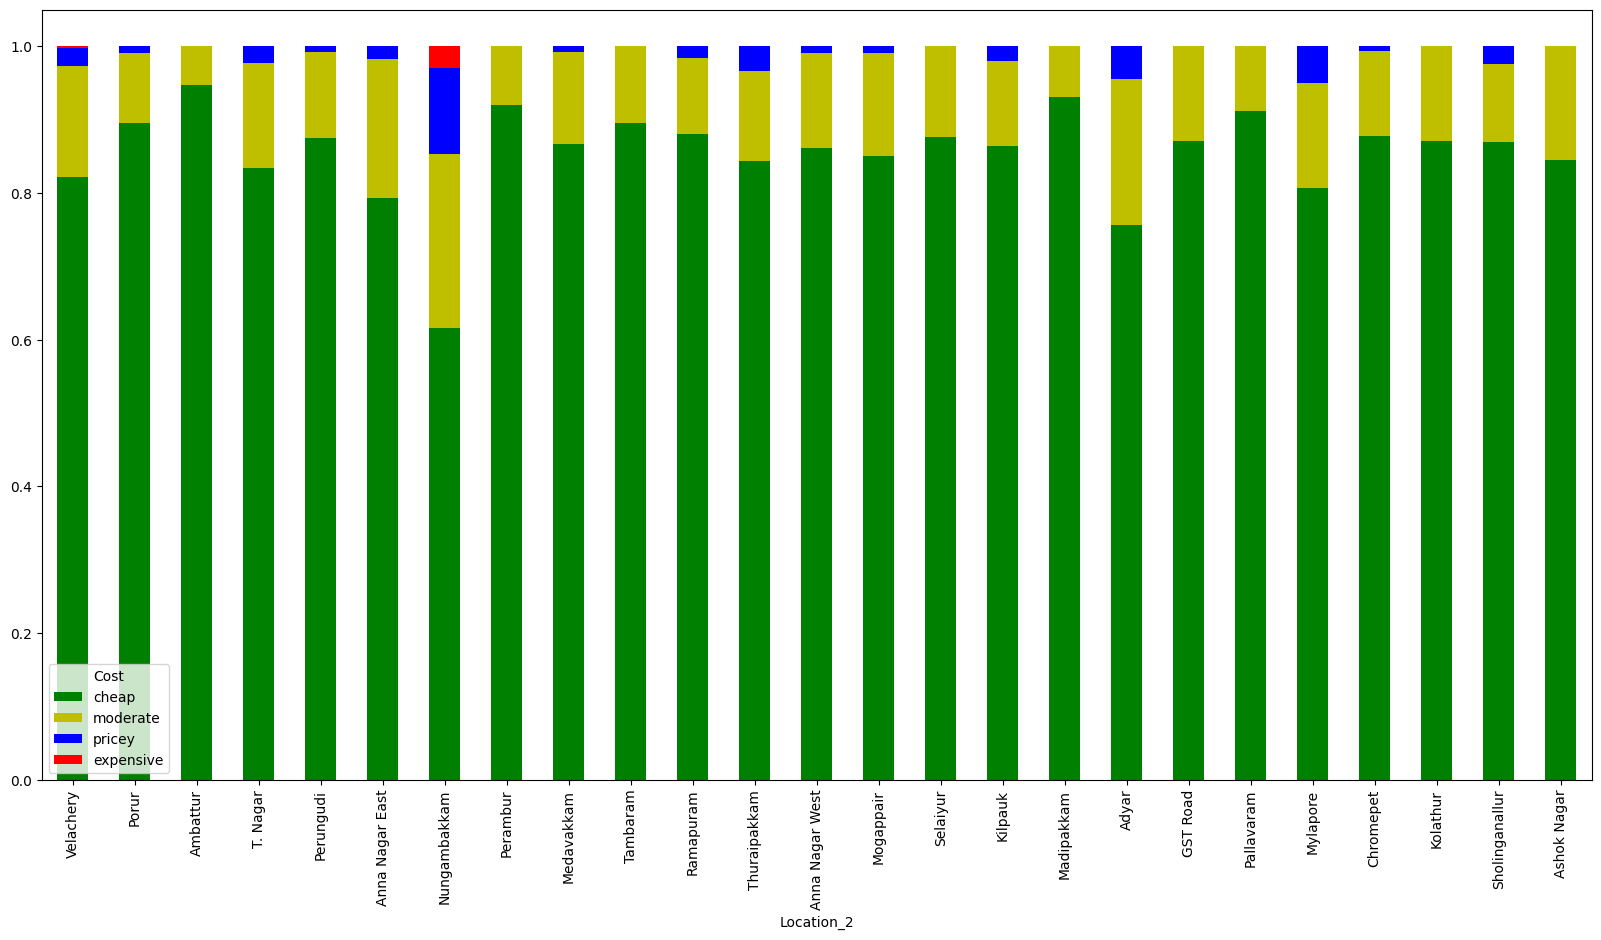

In [55]:
loc_price0 = pd.crosstab(dataset_df['Location_2'],dataset_df['Cost'],margins=True,margins_name='Total') 
loc_price1 = loc_price0.sort_values('Total',ascending=False)[1:26]
loc_price1.drop(columns=['Total'],inplace=True)
loc_price1.div(loc_price1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(20, 10),color = ['g','y','b','r'])